# Анализируем данные

In [2]:
%pip install seaborn
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


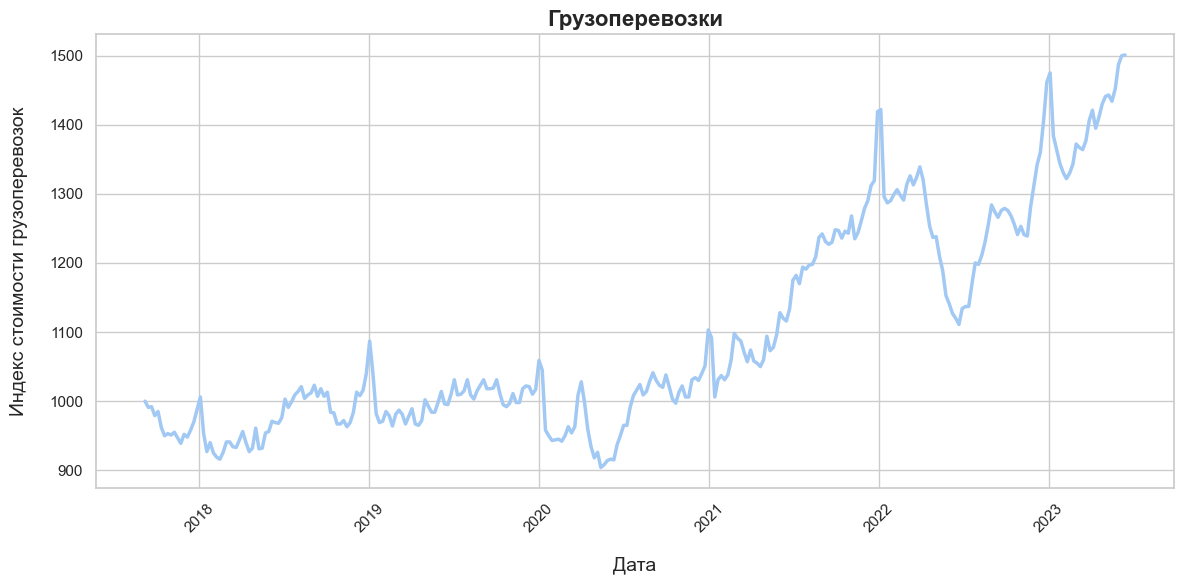

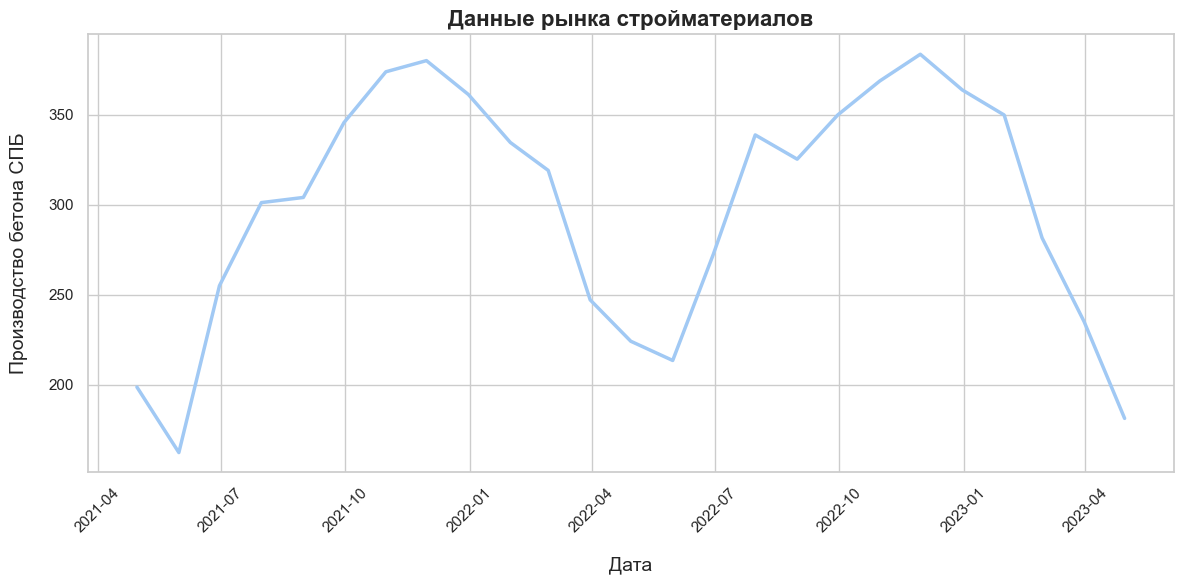

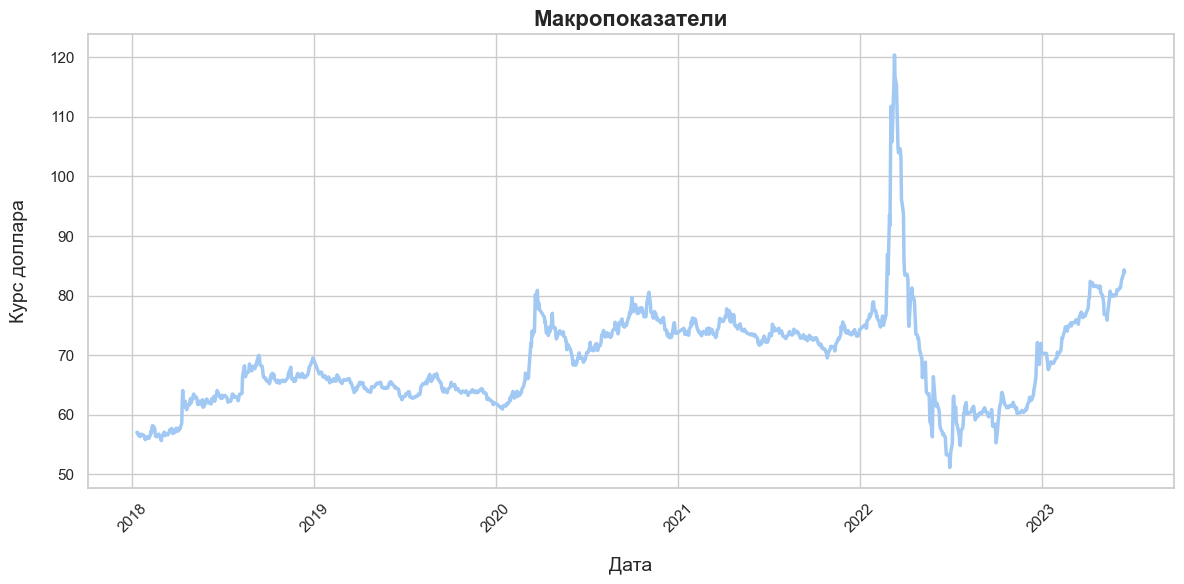

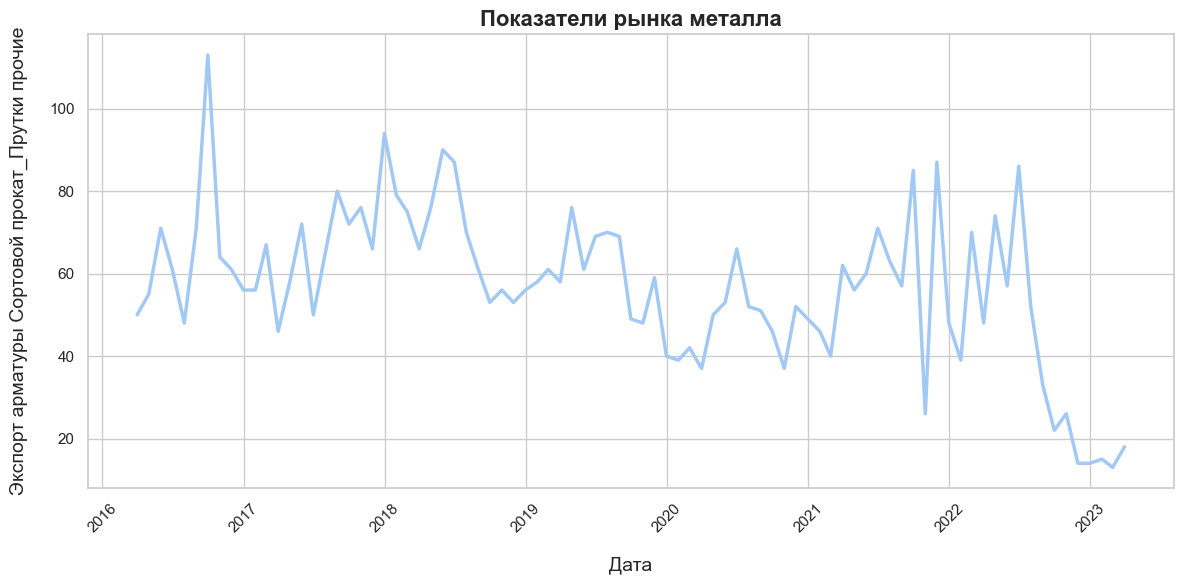

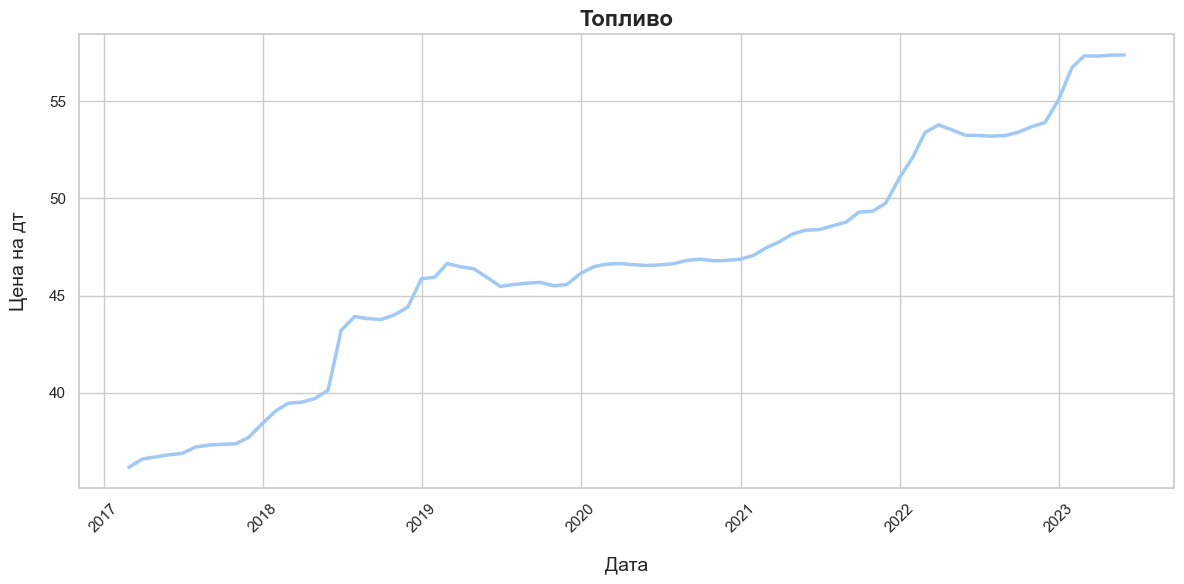

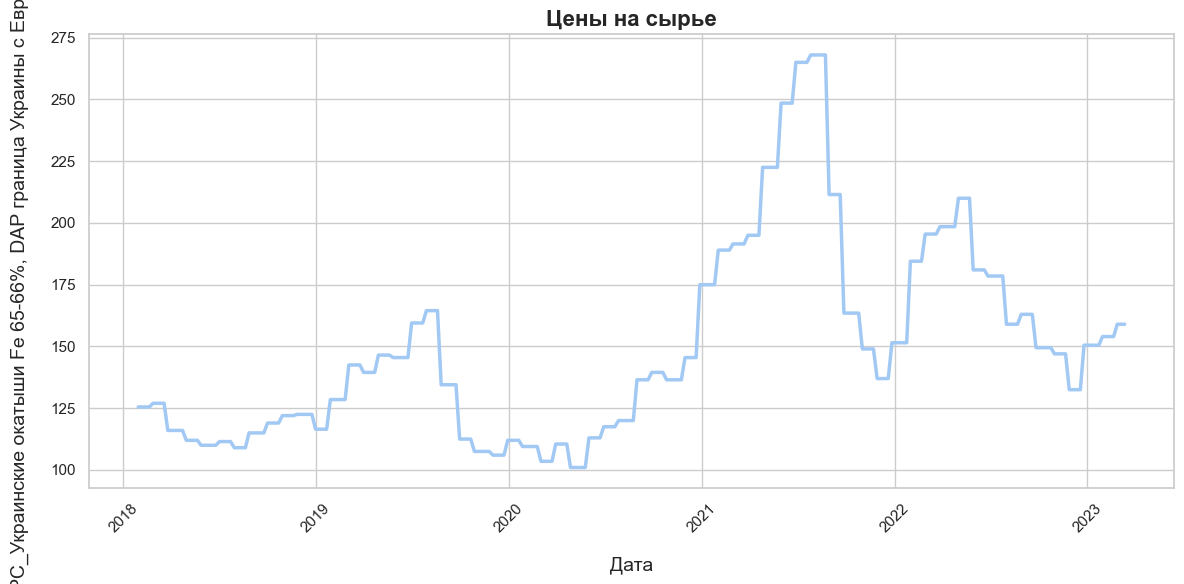

In [ ]:
sns.set(style="whitegrid")  # белая сетка
sns.set_palette("pastel")  # нежные цвета

p = Path("data/xlsx/")
for x in p.rglob("*"):
    df = pd.read_excel(x, index_col=0)
    
    # Создание графика
    plt.figure(figsize=(12, 6))  # размер графика
    sns.lineplot(x='dt', y=df.columns[-1], data=df, linewidth=2.5)
    
    # Настройки заголовка и меток
    plt.title(str(x)[10:-5], fontsize=16, fontweight='bold')
    plt.xlabel('Дата',labelpad=15, fontsize=14)
    plt.ylabel(df.columns[-1],labelpad=15, fontsize=14)
    plt.xticks(rotation=45)  # поворот меток по оси X
    plt.tight_layout()  # улучшение размещения элементов на графике
    
    plt.show()


In [ ]:
for x in p.rglob("*"):
    df = pd.read_excel(x, index_col=0)
    
    for column in df.columns[1:]:
        # Создание графика
        plt.figure(figsize=(12, 6))
        sns.lineplot(x='dt', y=column, data=df, linewidth=2.5)
        
        # Настройки заголовка и меток
        plt.title(f"{str(x)[10:-5]} - {column}", fontsize=16, fontweight='bold')
        plt.xlabel('Дата', labelpad=15, fontsize=14)
        plt.ylabel(column, labelpad=15, fontsize=14)
        plt.xticks(rotation=45)
        plt.tight_layout()
        
        plt.show()

In [7]:
df = pd.read_excel("data/train.xlsx")

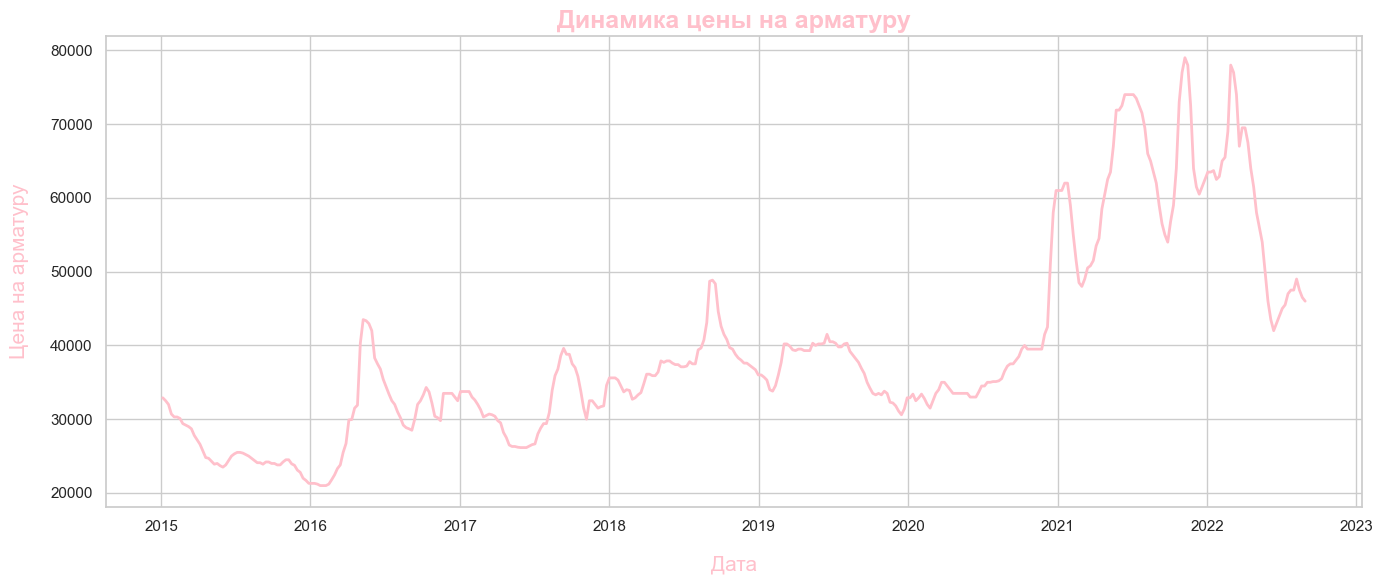

In [23]:
plt.figure(figsize=(14, 6), facecolor='white')

# Настройка цвета графика
sns.lineplot(x='dt', y=df.columns[-1], data=df, color='pink', linewidth=2)

# Метки осей
plt.xlabel('Дата',labelpad=15, fontsize=15,color='pink')
plt.ylabel('Цена на арматуру', labelpad=15, fontsize=15,color='pink')

# Заголовок графика
plt.title('Динамика цены на арматуру', fontsize=18, fontweight='bold',color='pink')

# Отображение графика
plt.tight_layout()
plt.show()


In [5]:
p = Path("data/xlsx/")
dfs = []
for x in p.rglob("*"):
    df = pd.read_excel(x)
    dfs.append(df)
dfs.append(pd.read_csv('data/train.csv'))
dfs.append(pd.read_csv('data/test.csv'))
df_merged = pd.concat(dfs, axis=0, ignore_index=False, sort=False)
df_merged['dt'] = pd.to_datetime(df_merged['dt'])
df_merged = df_merged.sort_values(by='dt')

In [6]:
df_merged['week'] = df_merged['dt'].dt.to_period('W')
df_merged = df_merged.groupby('week').agg('first').reset_index()
df_merged = df_merged.drop(columns='week')

In [11]:
df_merged = df_merged.dropna(subset=["Цена на арматуру"])

In [7]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Columns: 160 entries, dt to Цена на арматуру
dtypes: datetime64[ns](1), float64(159)
memory usage: 550.1 KB


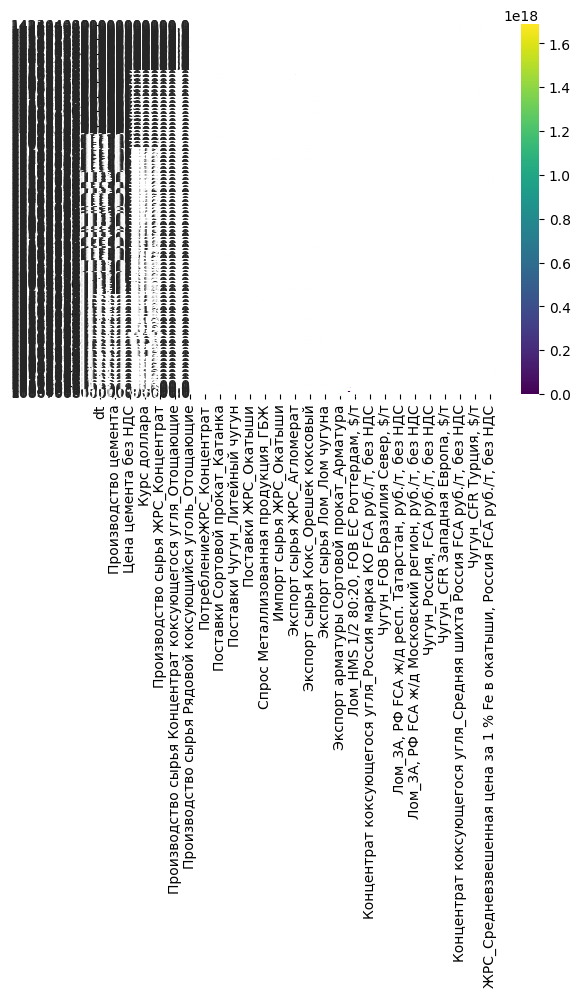

In [63]:
df_merged['dt'] = pd.to_numeric(df_merged['dt'])
sns.heatmap(df_merged, annot=True, fmt=".1f", cmap="viridis")
df_merged['dt'] = pd.to_datetime(df_merged['dt'])

In [9]:
%pip install missingno
import missingno as msno


  Obtaining dependency information for missingno from https://files.pythonhosted.org/packages/87/22/cd5cf999af21c2f97486622c551ac3d07361ced8125121e907f588ff5f24/missingno-0.5.2-py3-none-any.whl.metadata

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


<Axes: >

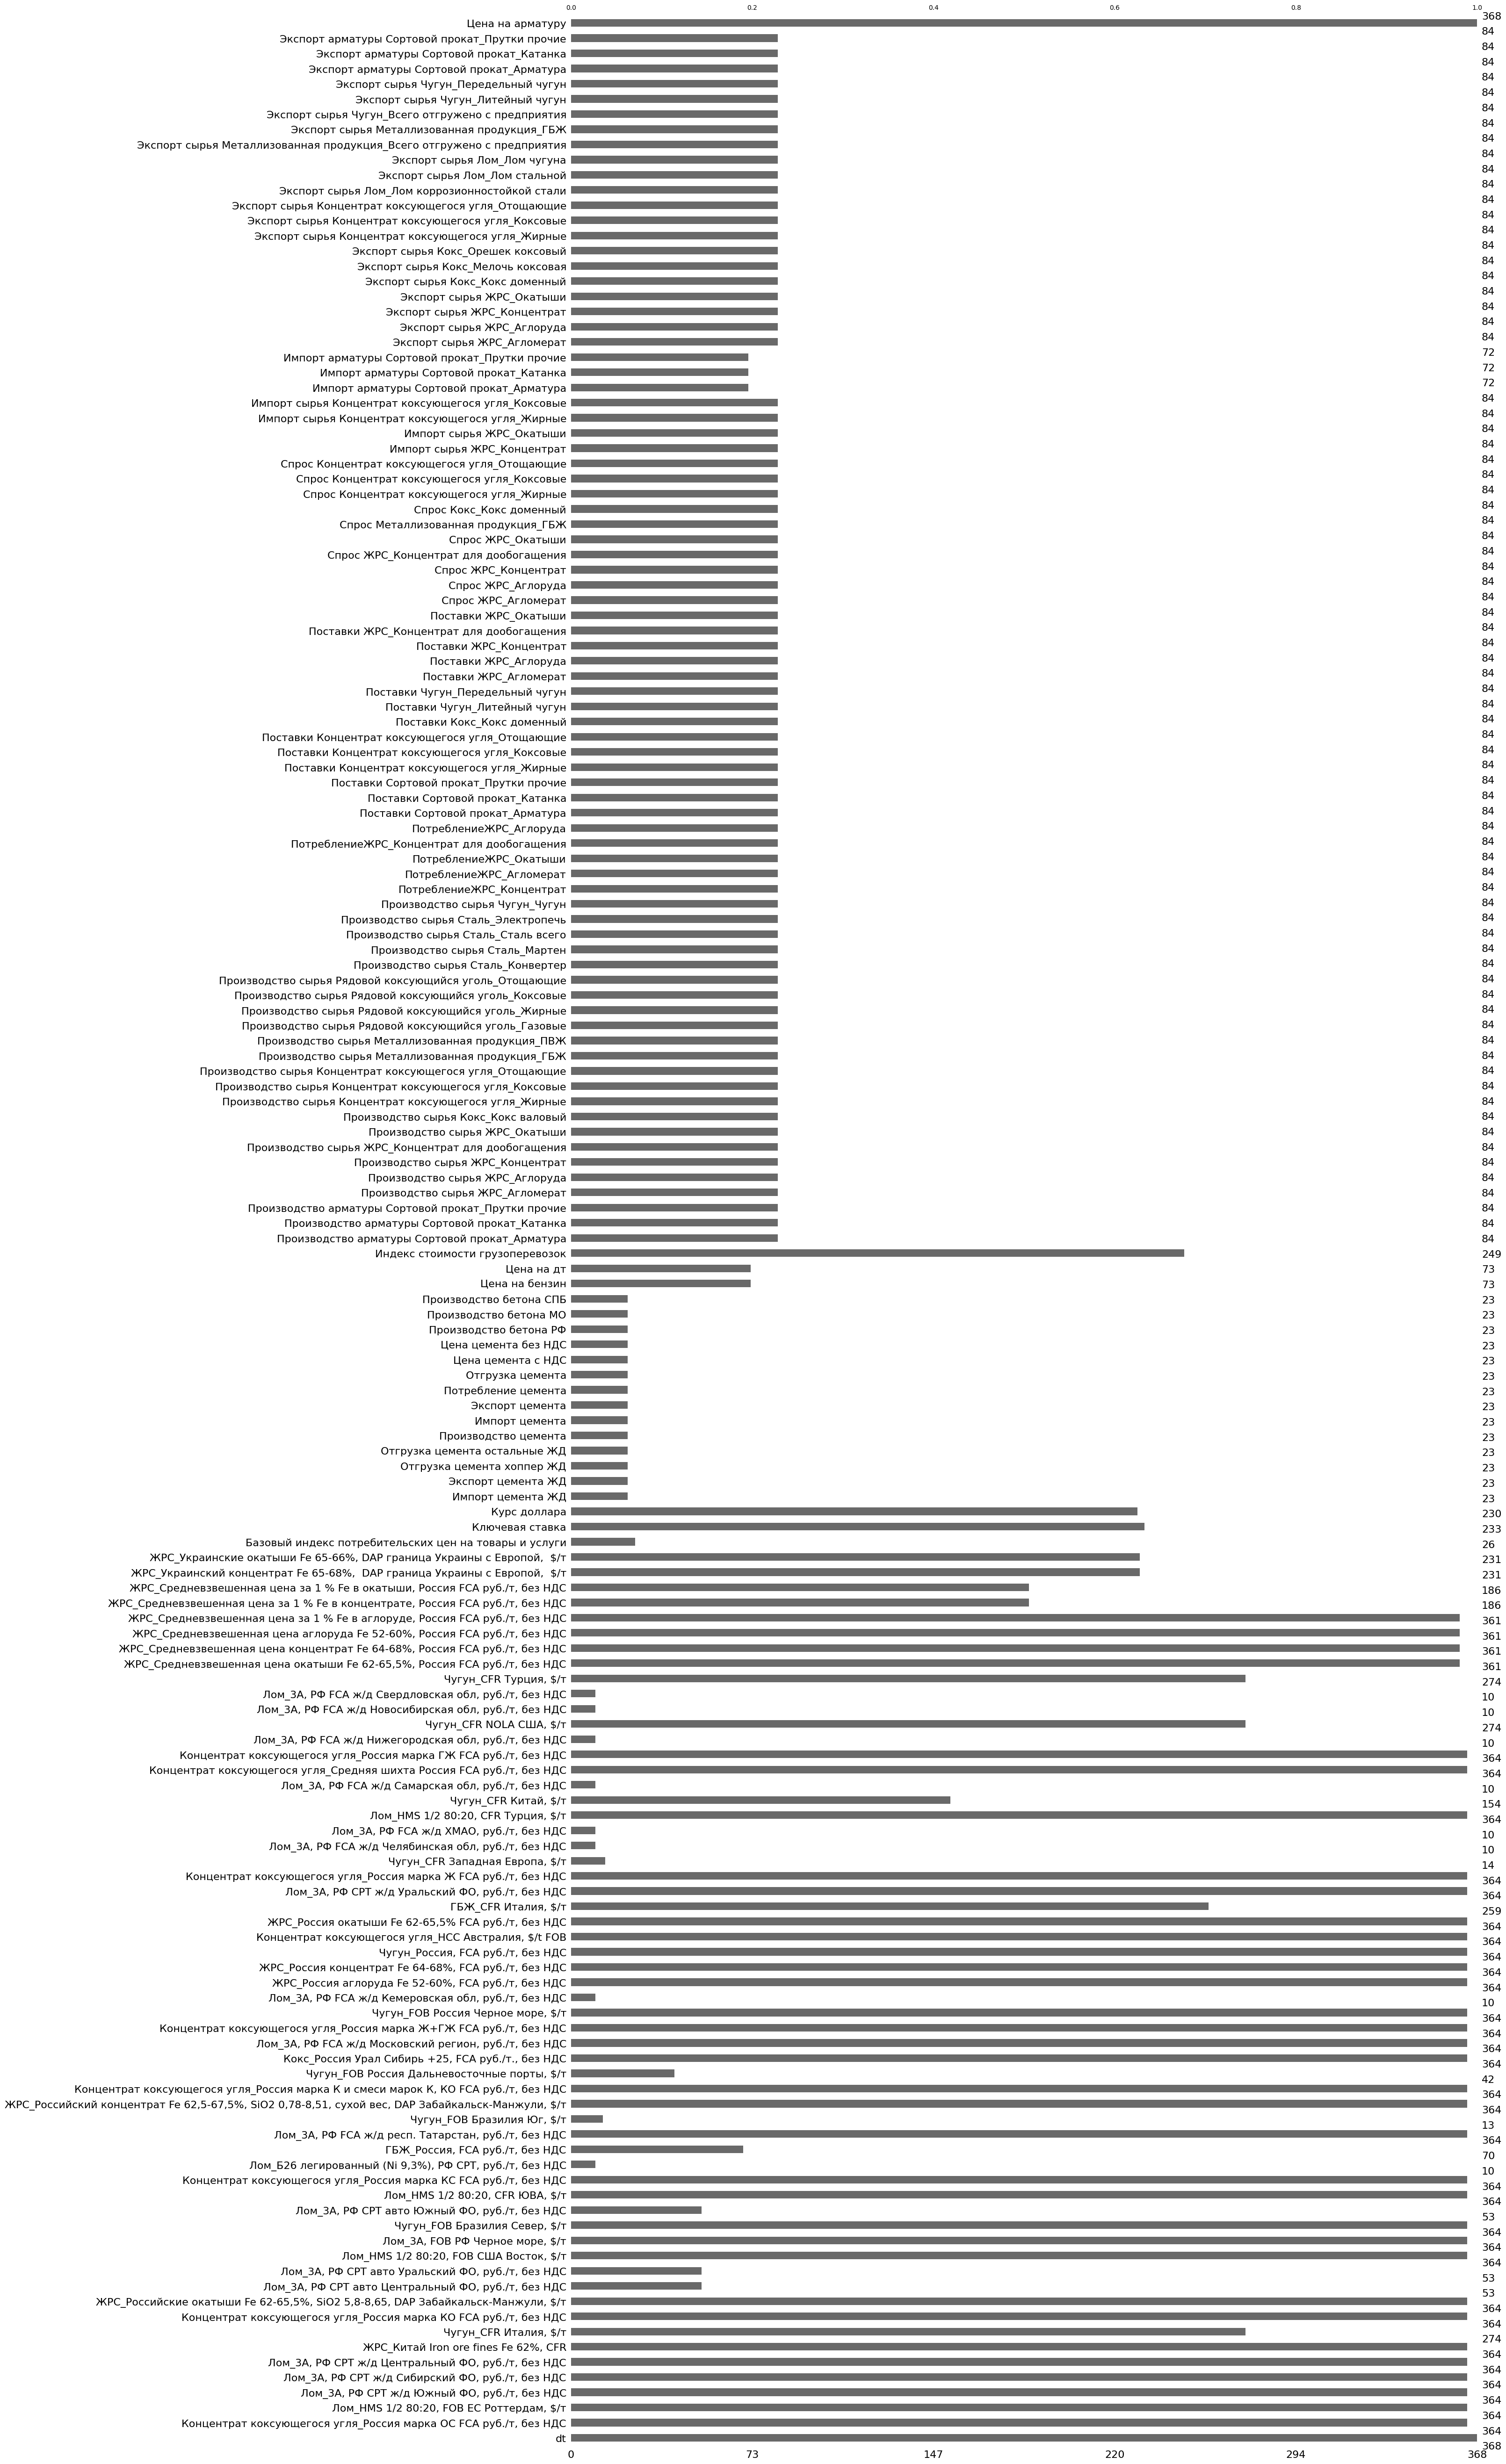

In [12]:

msno.bar(df_merged)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:


# Вычисляем матрицу корреляции
correlation_matrix = df_merged.corr()


# Визуализация матрицы корреляции с помощью тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Матрица корреляции")
plt.show()